# Project Overview

This project involves analyzing a targeted marketing ad campaign on Facebook with the goal of predicting customer behavior—specifically, determining which customers are likely to click on advertisements. By building a predictive model, this project aims to improve the effectiveness of the campaign.

### Data Description

The customer data provided includes the following features:

#### Inputs:
  - **Name**: Customer's name
  - **e-mail**: Customer's email address
  - **Country**: Customer's country of residence
  - **Time on Facebook**: Amount of time spent by the customer on Facebook
  - **Estimated Salary**: Estimated salary of the customer (derived from other parameters)

#### Output:
  - **Click**: Indicates whether the customer clicked on the ad
    -  Customer clicked on the ad: `1`
    -  Customer did not click on the ad: `0`

This data forms the basis for building a machine learning model to predict the likelihood of customer clicks on ads, thereby assisting in refining marketing strategies.


# Step #1: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


c:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# read the data using pandas dataframe
clicks_df = pd.read_csv('clicks_dataset.csv', encoding='ISO-8859-1')

In [3]:
# Show the data head!
clicks_df.head(10)

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.65222,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.39815,1
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,25.676920,29851.41153,0
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.11878,1
9,Rhonda Chavez,nec@nuncest.com,Somalia,29.687362,41098.87881,0


In [4]:
# Show the data tail!
clicks_df.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **Display the first and last 10 rows of the dataframe** 
- **Calculate the average salary**

In [5]:
clicks_df.mean(numeric_only=True)

Time Spent on Site       32.920178
Salary                52896.992469
Clicked                   0.501002
dtype: float64

# Step #2: EXPLORE DATASET

In [6]:
click = clicks_df[clicks_df.Clicked==1]
no_click = clicks_df[clicks_df.Clicked==0]
click.head(10)

,Names,emails,Country,Time Spent on Site,Salary,Clicked
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.65222,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.39815,1
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.11878,1
13,Tatum Moon,Cras.sed.leo@Seddiamlorem.ca,"Palestine, State of",46.540708,48663.49468,1
14,Sharon Sharpe,eget.metus@aaliquetvel.co.uk,United Arab Emirates,37.716582,64695.97700,1
16,Blaine Bender,ultrices.posuere.cubilia@pedenonummyut.net,Tokelau,41.095960,49463.38130,1
18,Sloane Mann,at.augue@augue.net,Chad,48.870175,34774.44407,1
22,Nola Wiggins,Aliquam@augue.edu,Nigeria,42.249190,32215.09950,1


In [7]:
print("Total =", len(clicks_df))

print("Number of customers who clicked on Ad =", len(click))
print("Percentage Clicked =", 1.*len(click)/len(clicks_df)*100.0, "%")
 
print("Did not Click =", len(no_click))
print("Percentage who did not Click =", 1.*len(no_click)/len(clicks_df)*100.0, "%")
 
        

Total = 499
Number of customers who clicked on Ad = 250
Percentage Clicked = 50.1002004008016 %
Did not Click = 249
Percentage who did not Click = 49.899799599198396 %


In [8]:
clicks_df.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


# Step #3: PERFORM DATA VISUALIZATION

<Axes: xlabel='Time Spent on Site', ylabel='Salary'>

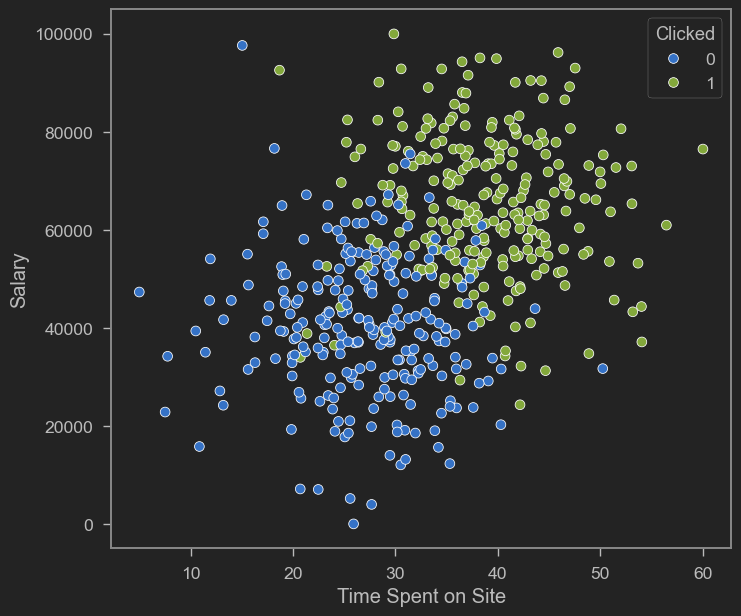

In [ ]:
# Import seaborn for data visualization
import seaborn as sns

# Create a scatter plot to analyze customer behavior
# 'x' represents the time a customer spent on the site
# 'y' represents the customer's salary
# 'hue' represents whether the customer clicked on the ad or not (0 = did not click, 1 = clicked)
sns.scatterplot(
    x=clicks_df['Time Spent on Site'],  # x-axis: time spent on site by each customer
    y=clicks_df['Salary'],              # y-axis: salary of each customer
    hue=clicks_df['Clicked']            # color-coded by 'Clicked' status
)

<Axes: xlabel='Clicked', ylabel='Salary'>

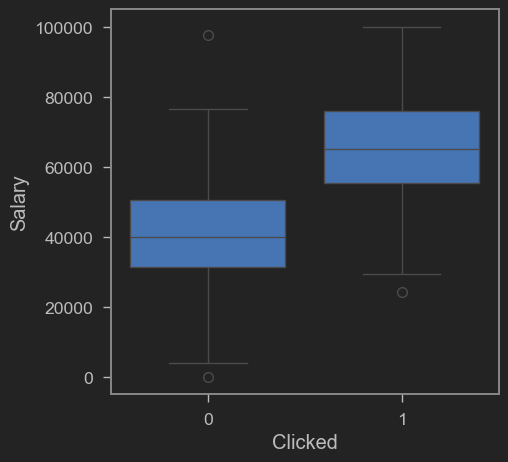

In [ ]:
# Set up the figure size for better visualization
plt.figure(figsize=(5, 5))

# Create a box plot to analyze the distribution of salaries based on click status
# 'x' represents whether the customer clicked on the ad or not (0 = did not click, 1 = clicked)
# 'y' represents the salary of each customer
# 'data' specifies the DataFrame containing the data
sns.boxplot(
    x='Clicked',   # x-axis: click status (0 or 1)
    y='Salary',    # y-axis: salary of each customer
    data=clicks_df # data source
)

<Axes: >

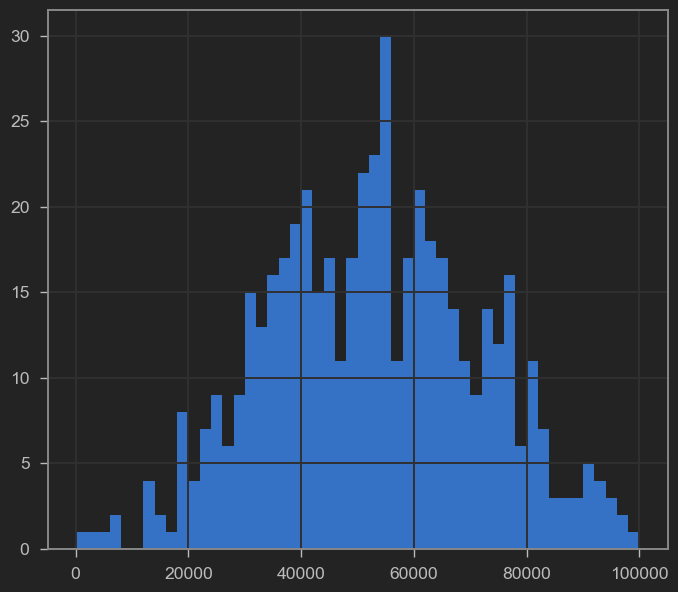

In [11]:
# Create a histogram to visualize the distribution of the 'Salary' column
# 'bins=50' divides the salary data into 50 intervals (bins) for better granularity
# x-axis: Represents different salary ranges (in intervals or bins)
# y-axis: Represents the frequency/count of customers within each salary range
clicks_df.Salary.hist(bins=50)



**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Plot the histogram of "Time Spent on Site", use 30 bins.**
- **Plot the boxplot showing "clicked" vs. "Time Spent on Site".**


<Axes: >

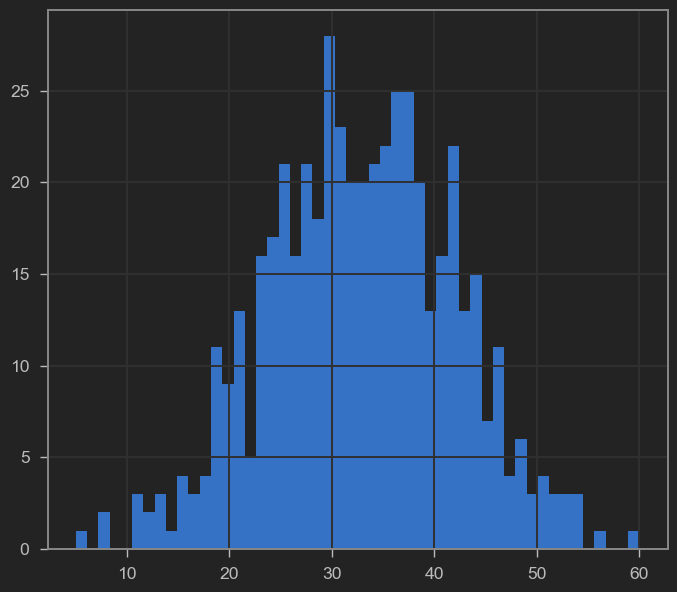

In [12]:
# Create a histogram to visualize the distribution of the 'Time Spent on Site' column
# 'bins=50' divides the time data into 50 intervals (bins) for more detailed visualization
# x-axis: Represents the time spent on the site (in intervals or bins)
# y-axis: Represents the frequency/count of customers for each time range
clicks_df['Time Spent on Site'].hist(bins=50)


# Step #4: PREPARE THE DATA FOR TRAINING

In [13]:
clicks_df

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0
...,...,...,...,...,...,...
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0


In [14]:
# Drop the columns 'Names', 'emails', and 'Country' from the DataFrame
# axis=1 specifies that we are dropping columns (not rows)
# inplace=True means the changes will be applied directly to clicks_df without needing reassignment
clicks_df.drop(['Names', 'emails', 'Country'], axis=1, inplace=True)


In [15]:
clicks_df

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


In [16]:
# Separate the features (X) and target variable (y) for training the model
# Drop the 'Clicked' column from clicks_df to create the features dataset (X)
# .values converts the DataFrame (or Series) to a NumPy array for compatibility with ML models
X = clicks_df.drop('Clicked', axis=1).values  # Feature set
y = clicks_df['Clicked'].values               # Target variable


In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


# Step #5: PERFORM MODEL TRAINING

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [19]:
X_train

array([[ 9.97297177e-01,  9.64674708e-02],
       [-1.08480907e+00, -7.86291560e-01],
       [ 7.67911699e-01,  7.06197711e-01],
       [ 4.14921072e-01,  1.68278508e+00],
       [-9.42115649e-01, -6.82921220e-01],
       [ 9.00127361e-02,  9.03336004e-01],
       [-3.80543438e-01, -8.33300911e-01],
       [ 6.38603734e-03,  1.46624390e+00],
       [ 7.58754335e-01,  9.28106741e-01],
       [ 1.87441076e-01,  4.63852044e-01],
       [ 6.05017234e-01,  4.21569136e-01],
       [-4.39547045e-01, -6.74015836e-01],
       [ 1.55596010e+00,  1.46613769e+00],
       [-6.31381571e-01,  1.10571322e-01],
       [-1.05140613e+00,  3.96649865e-01],
       [-1.53834725e+00,  6.36975234e-01],
       [ 1.26919024e+00,  5.37010699e-01],
       [-2.76609826e+00, -9.84487785e-01],
       [ 4.17850565e-02,  7.22629886e-01],
       [-2.57773009e-01,  6.77162007e-01],
       [-7.59855841e-01, -8.40723148e-01],
       [-1.07088607e+00, -5.56898156e-01],
       [ 1.90310940e+00, -1.11700106e+00],
       [-4.

In [20]:
y_train

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

# Fitting XG-Boost to the Training set
# from sklearn.ensemble import GradientBoostingClassifier
# model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
# model.score(X_test, y_test)


LogisticRegression()

In [23]:
X_train.shape

(399, 2)

In [24]:
y_train.shape

(399,)

# Step #6: TEST TRAINED MODEL 

In [25]:
# Generate predictions on the training data (X_train)
# This helps evaluate if the model is overfitting or underfitting by comparing its performance on training vs test data
y_predict_train = model.predict(X_train)
y_predict_train  # Shows predictions on the training set

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,

In [26]:
y_train

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,

In [27]:
y_predict_test = model.predict(X_test)
y_predict_test

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

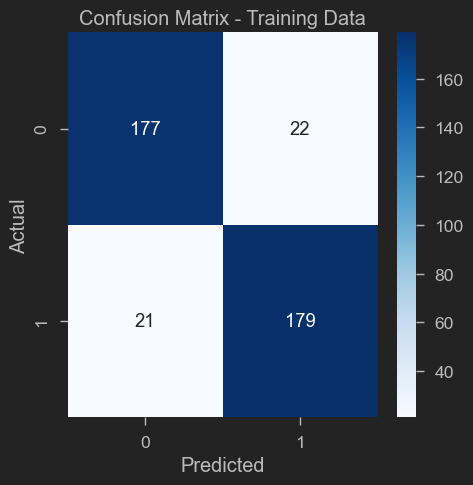

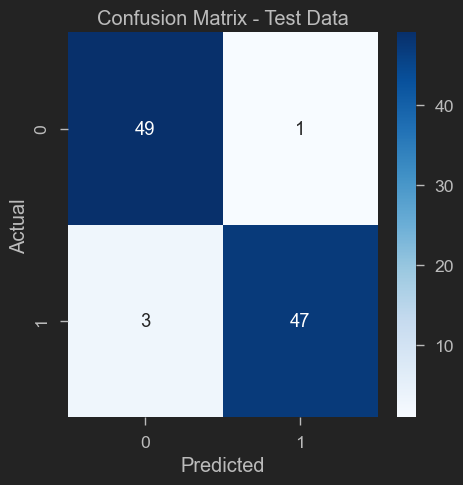

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Training Data Confusion Matrix
cm_train = confusion_matrix(y_train, y_predict_train)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Test Data Confusion Matrix (Ensure y_test and y_predict_test are defined)
cm_test = confusion_matrix(y_test, y_predict_test)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.98      0.94      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



# Step #7: VISUALIZE TRAINING AND TESTING DATASETS

In [31]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))


In [32]:
y_train.shape

(399,)

In [33]:
X_train.shape

(399, 2)

In [34]:
X1.shape

(728, 805)

(-3.787379255660188, 3.482620744339657)

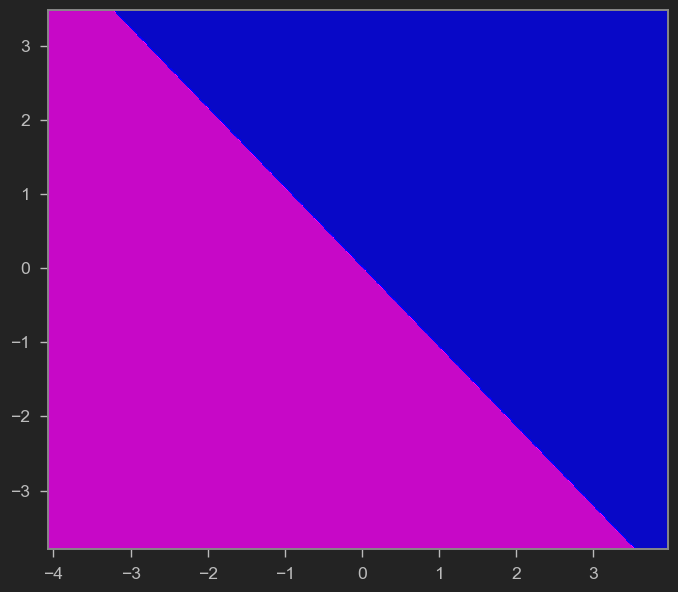

In [35]:
# plot the boundary using the trained classifier
# Run the classifier to predict the outcome on all pixels with resolution of 0.01
# Colouring the pixels with 0 or 1
# If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue 
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

C:\Users\Admin\AppData\Local\Temp\ipykernel_49364\2740813728.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


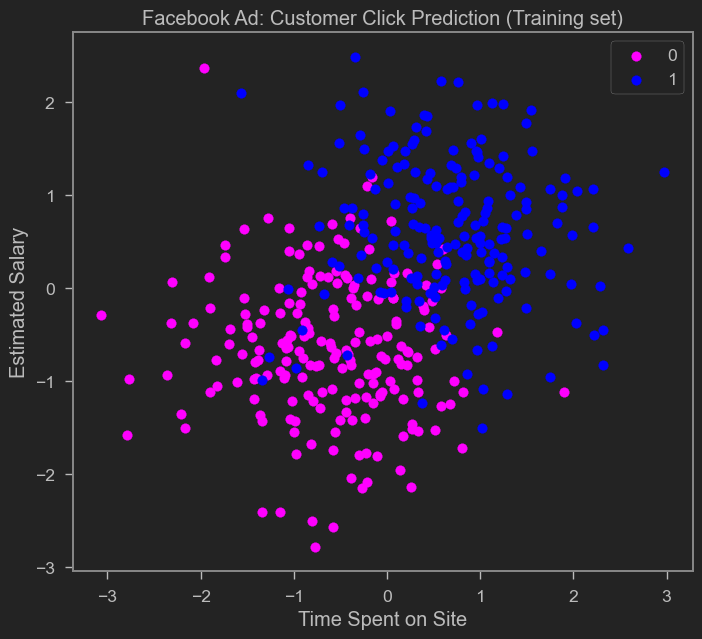

In [36]:
# plot all the actual training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_49364\856960727.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


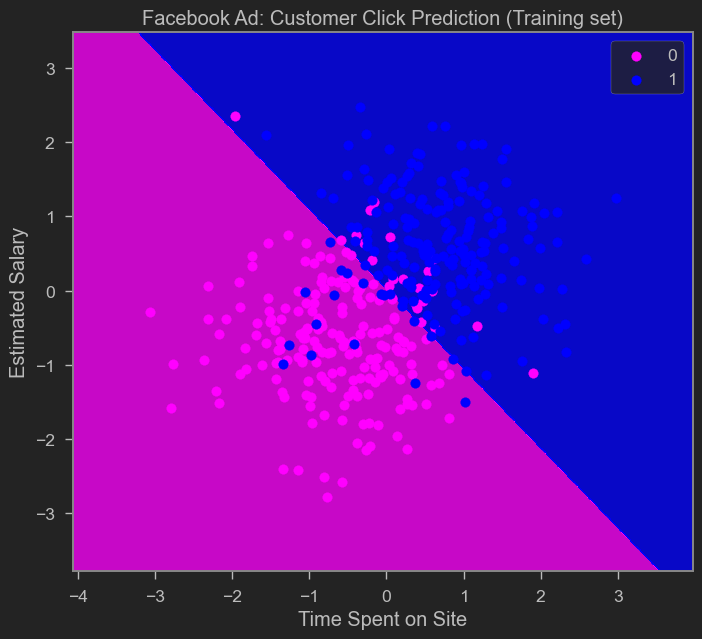

In [37]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_49364\2842573503.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


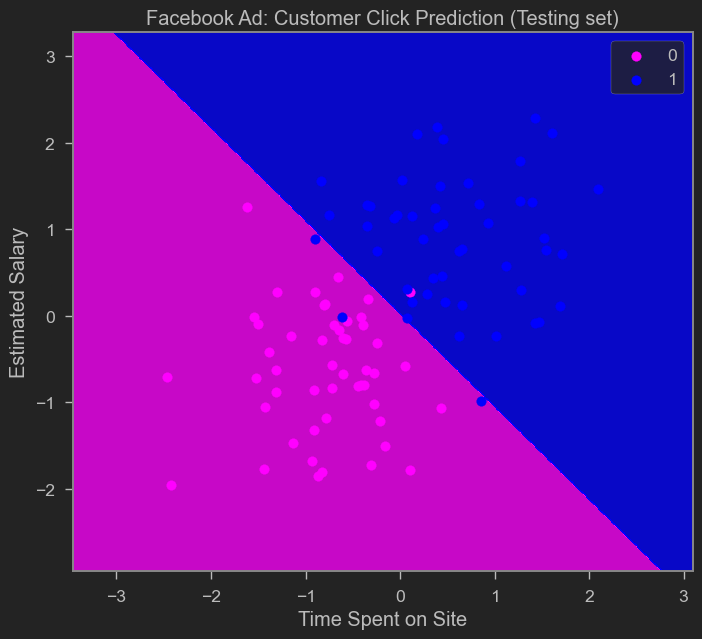

In [38]:
# Visualising the testing set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Testing set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()